In [5]:
import importlib
%reset

In [29]:
import pandas as pd
import importlib
from utils import price_opt_utils
importlib.reload(price_opt_utils)

<module 'utils.price_opt_utils' from 'D:\\python_projects\\ignize_final\\utils\\price_opt_utils.py'>

In [23]:
product = 'drill'
kwarg_product = dict(product = product)

In [24]:
X, y, relevant = price_opt_utils.get_x_y_relevant_dfs(**kwarg_product)

In [21]:
price_opt_utils.sweetviz_analysis(df = relevant, **kwarg_product)

                                             |          | [  0%]   00:00 -> (? left)

Report plots\general\sweetviz_drill.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [38]:
price_opt_utils.pairplot(df = relevant, **kwarg_product)

In [34]:
importlib.reload(price_opt_utils)
price_opt_utils.corrmatrix(relevant, **kwarg_product)

In [37]:
import importlib
importlib.reload(price_opt_utils)
price_opt_utils.corrmatrix_scaled(relevant, product)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression

for t in types:
    print('_______________')
    print(type)
    print()
    
    model = LinearRegression().fit(X[t], y[t])
    
    print("Model coefficients:\n")
    for i in range(X[t].shape[1]):
        print(X[t].columns[i], "=", model.coef_[i].round(5))
    
    y_true = y[t]
    y_pred = model.predict(X[t])
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    
    print()
    print('mae, mape, rmse')
    print(mae, mape, rmse)
    print()
    
    X_comb = X[t].copy(deep = True)
    X_comb['y_true'] = y[t]
    X_comb['y_pred'] = model.predict(X[t])
    X_comb['diff'] = X_comb['y_pred'] - X_comb['y_true'] 
    print(X_comb[['y_pred', 'y_true', 'diff']])
    

_______________
drill

Model coefficients:

Bucket volume std, m3 = 2819.43589
Tramming Capacity, t = 18556.39947
Weight Operating, t = -3560.07331
Tilt force, t = -1198.94248
Engine power, kW = -103.56833
Lift force, t = 2064.78351

mae, mape, rmse
1548.805326517424 0.01448462239284018 1894.3481707049118

          y_pred         y_true         diff
0  239538.606047  239200.000000   338.606047
1  185818.030611  184000.000000  1818.030611
2  219189.032467  220800.000000 -1610.967533
3  168801.164217  168666.666667   134.497551
4  120065.763285  122666.666667 -2600.903382
5   95427.834758   92000.000000  3427.834758
6   65483.316276   67466.666667 -1983.350391
7   55676.252339   55200.000000   476.252339
_______________
drill

Model coefficients:

Hole diameter min, mm = -1897.15423
Hole diameter max, mm = 3984.50766
Flushing air, m3/min = 3714.6218
Weight, kg = 0.41967
Drilling coverage, m2 = -17.24749
Percussion power std, kW = -4007.60524

mae, mape, rmse
9213.014434565452 0.18507532

In [33]:
mean_absolute_percentage_error([1,1], [1.5, 0.4])

0.55

In [55]:
import shap
shap.initjs()

Model coefficients:

Hole diameter min, mm = 179.37829
Hole diameter max, mm = 2246.33307
Flushing air, m3/min = -10502.82427
Weight, kg = 3.90789
Drilling coverage, m2 = 1727.60956
Percussion power std, kW = -201.30999


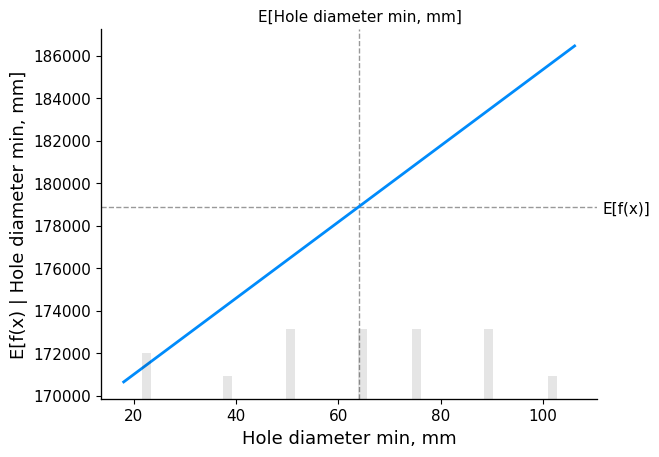

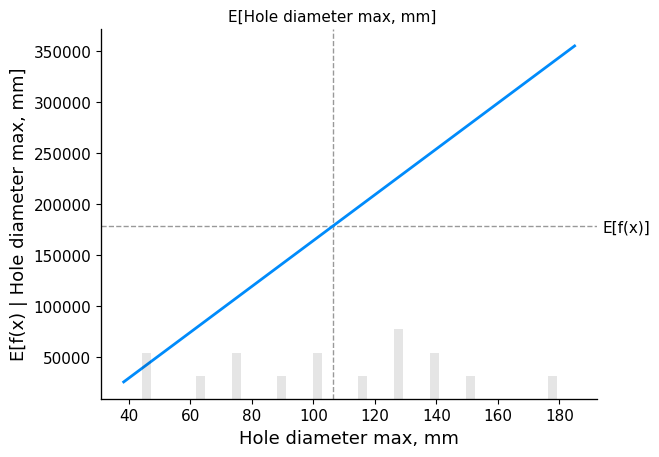

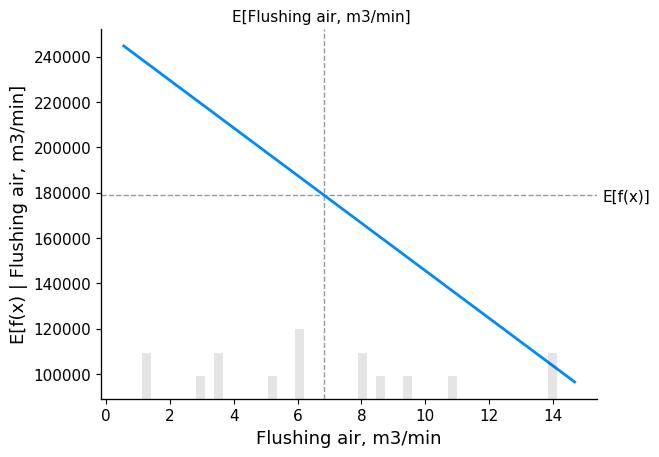

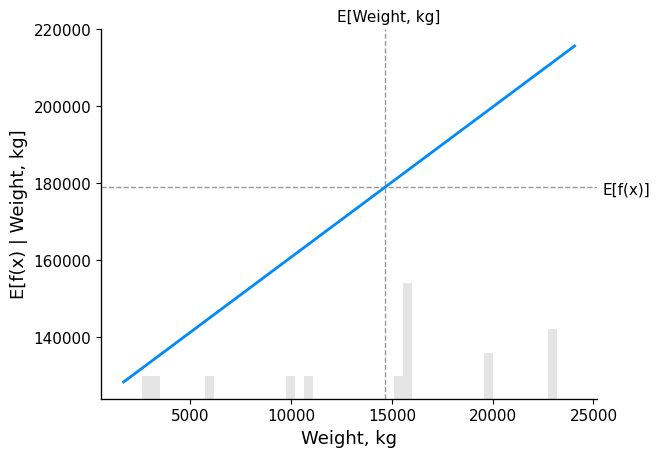

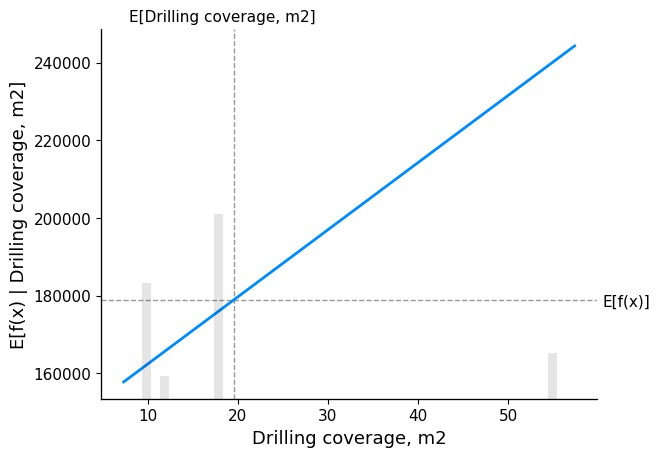

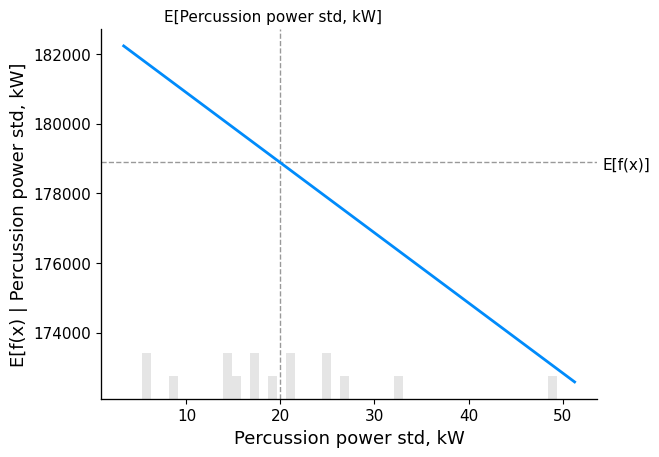

In [57]:
for i in range(len(X.columns)):
    shap.partial_dependence_plot(
        X.columns[i],
        model.predict,
        X,
        ice=False,
        model_expected_value=True,
        feature_expected_value=True,
    )

In [30]:
X_shap, y_shap = shap.datasets.california(n_points=1000)

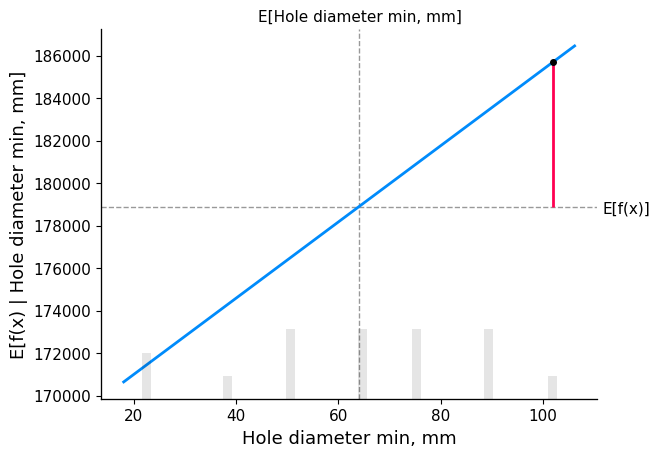

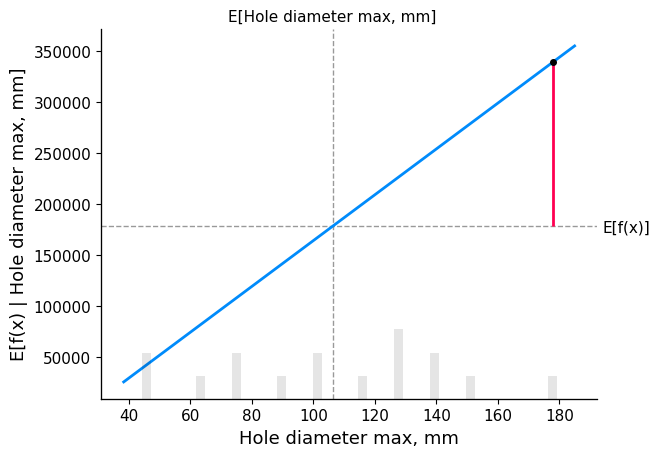

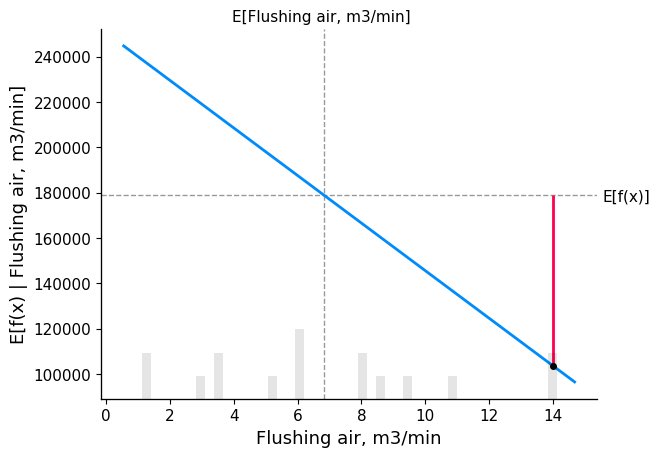

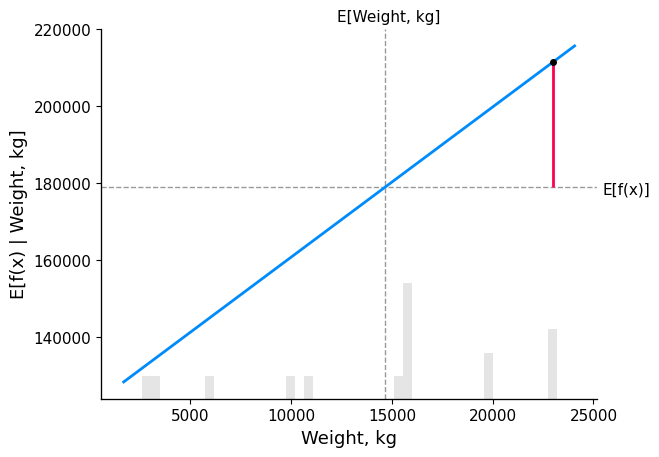

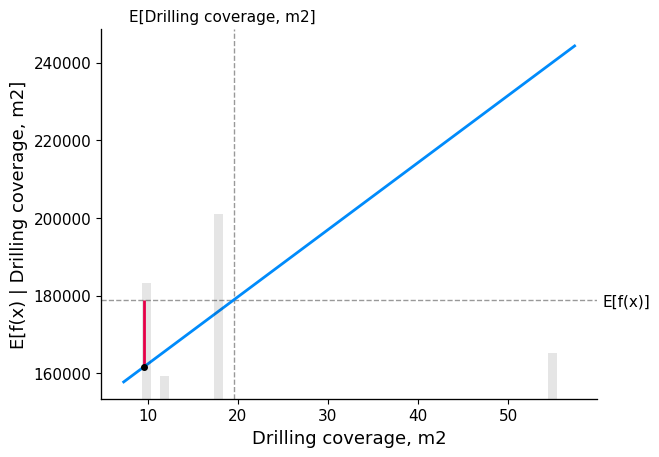

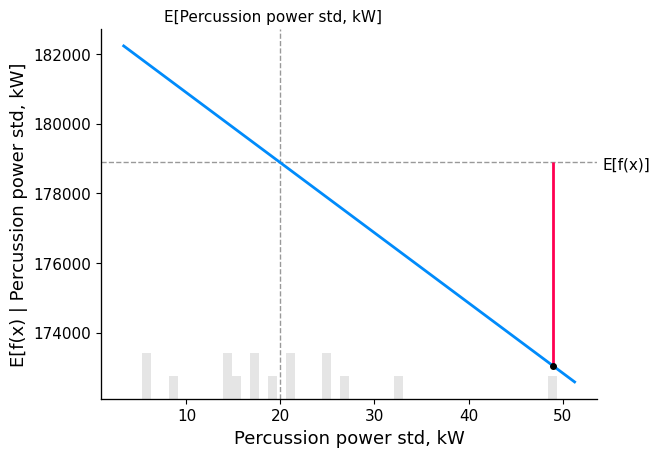

In [58]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 2
for i in range(len(X.columns)):
    shap.partial_dependence_plot(
        X.columns[i],
        model.predict,
        X,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=shap_values[sample_ind : sample_ind + 1, :],
    )

In [59]:
explainer = shap.LinearExplainer(model, X)
X.loc[len(X)] = [100, 100, 100, 100, 100, 100]

shap_values = explainer(X)
explanations = shap.Explanation(shap_values[:,:,], shap_values.base_values[:,], X, feature_names=X.columns)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [60]:
shap.bar_plot(shap_values)

TypeError: bad operand type for abs(): 'Explanation'

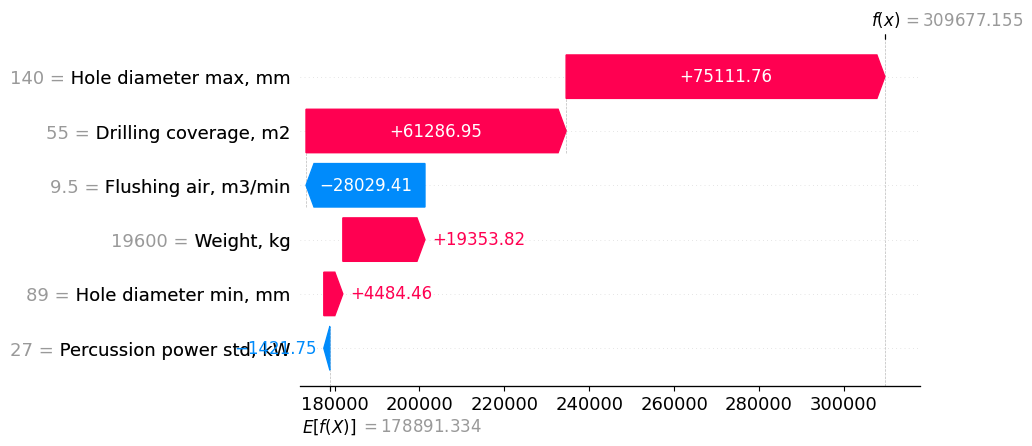

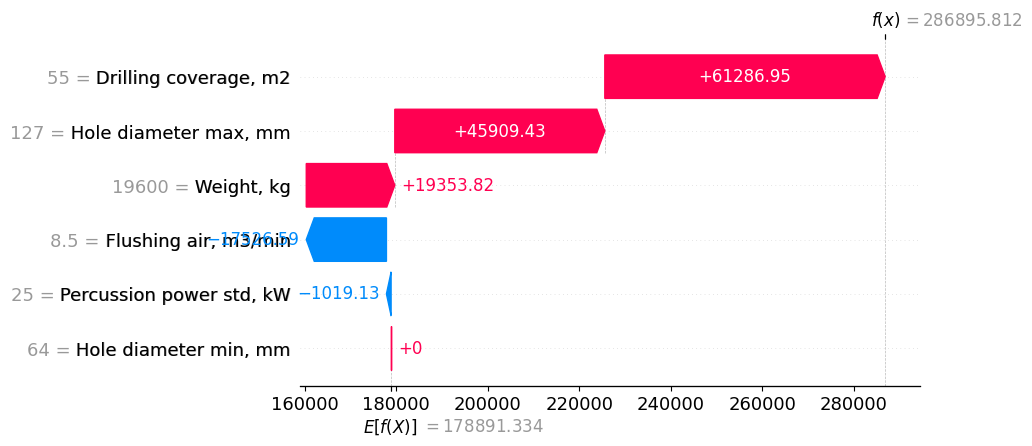

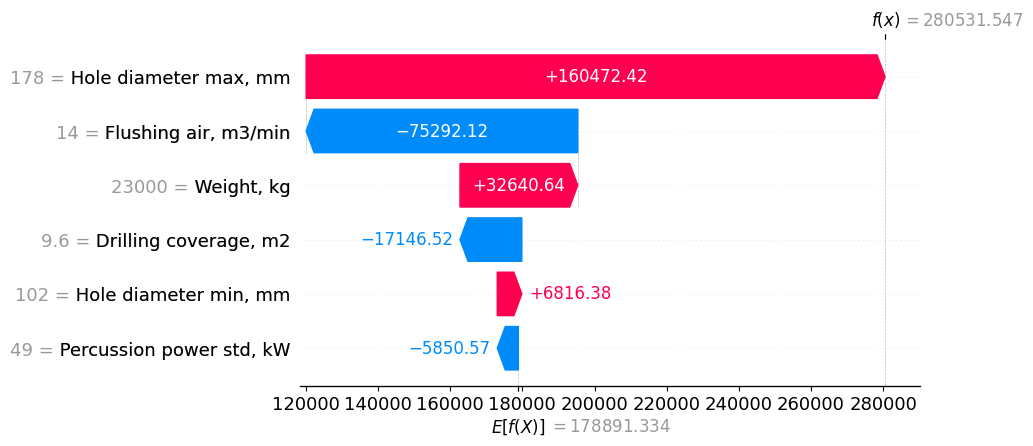

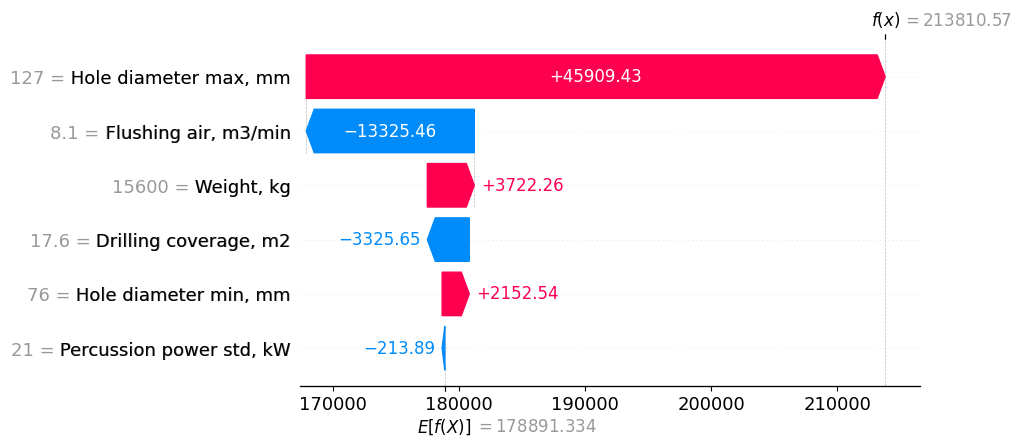

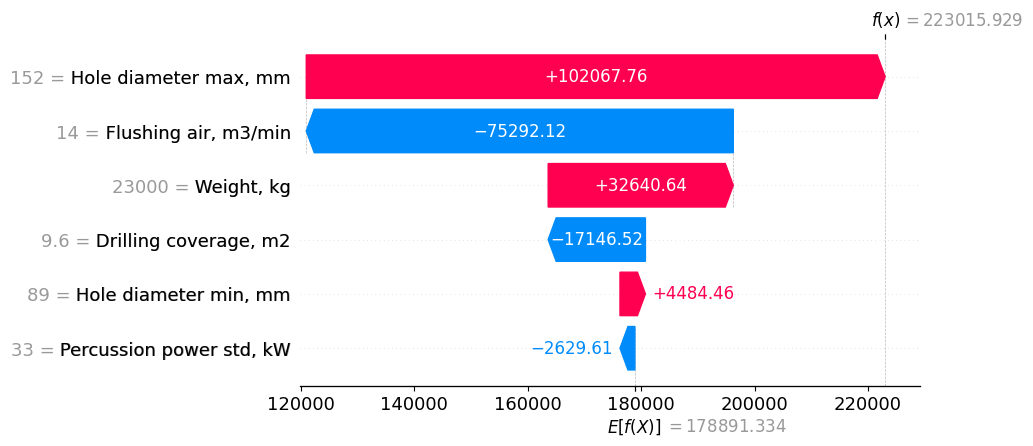

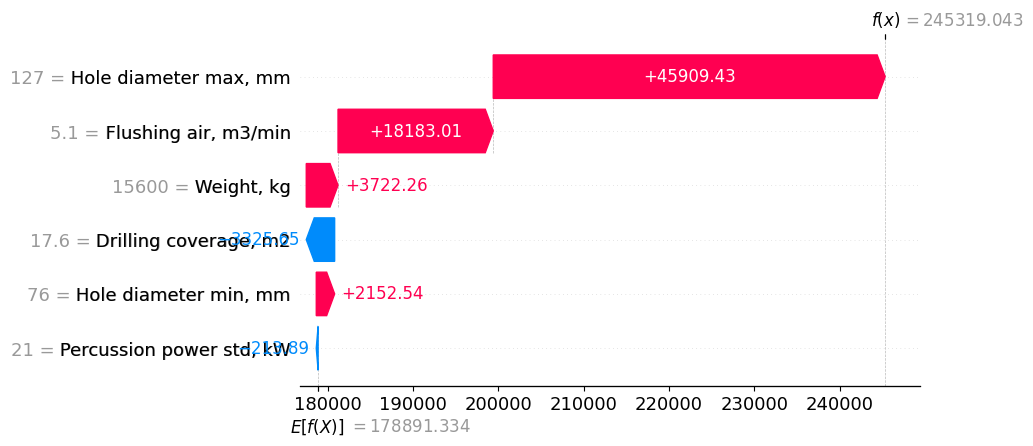

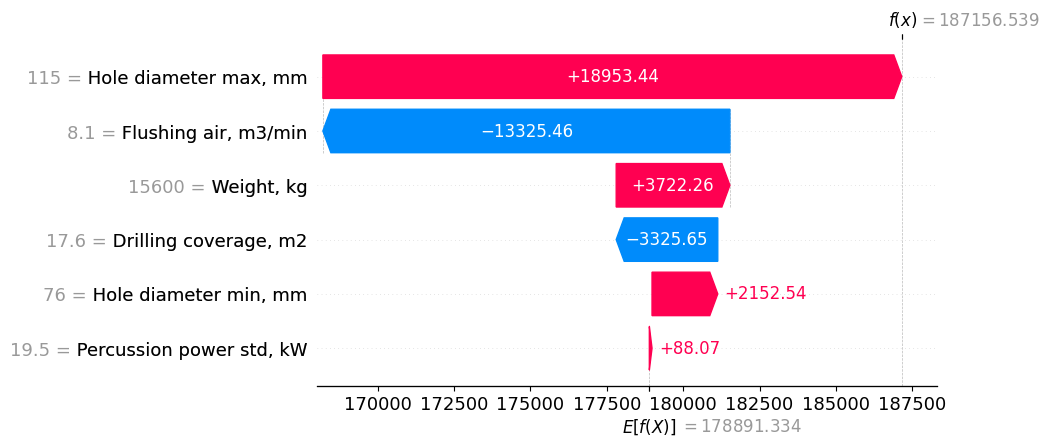

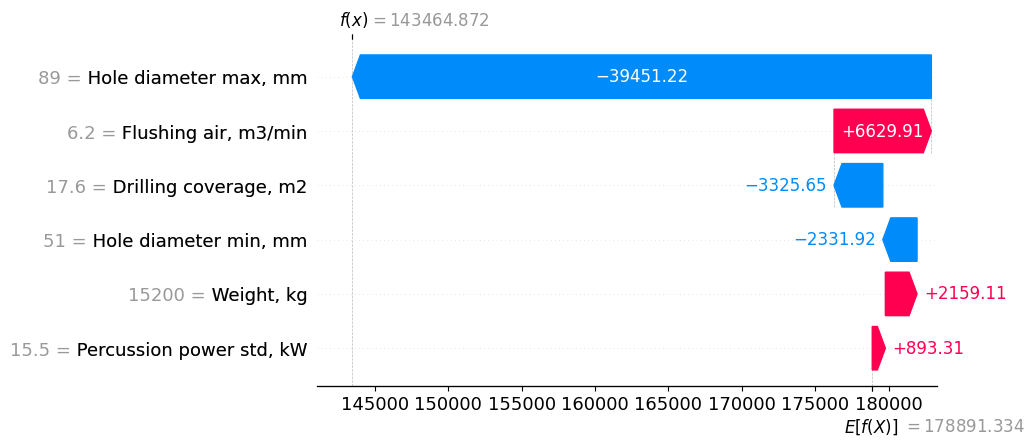

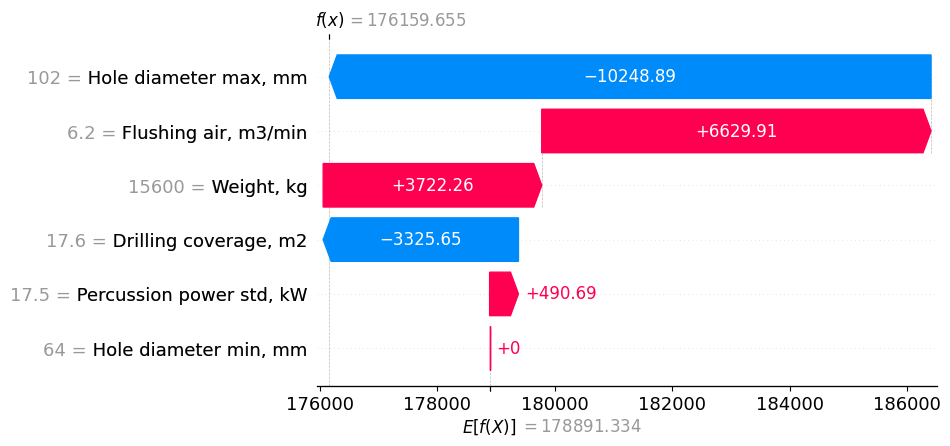

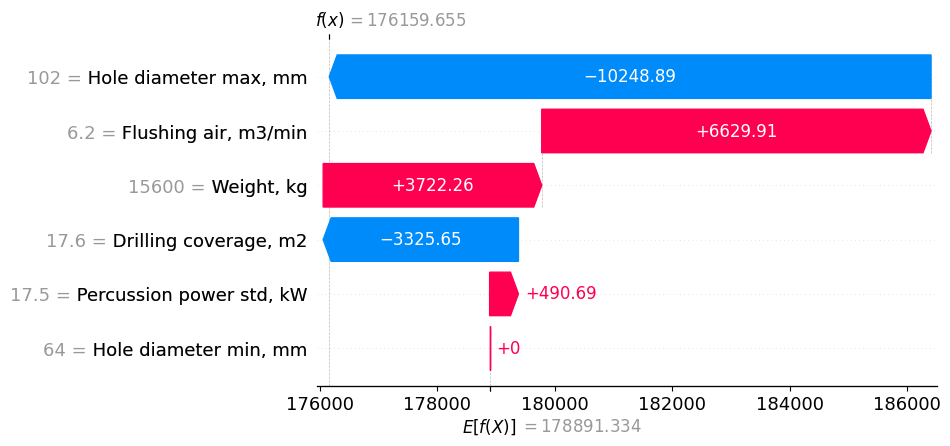

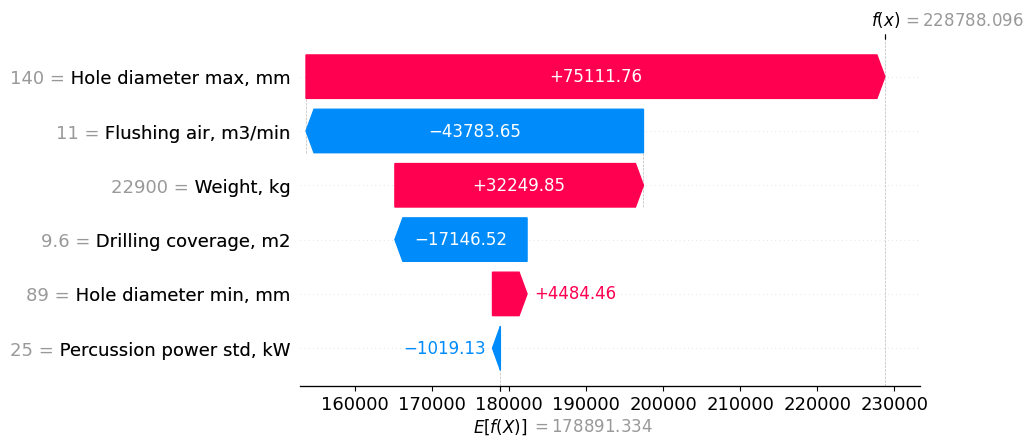

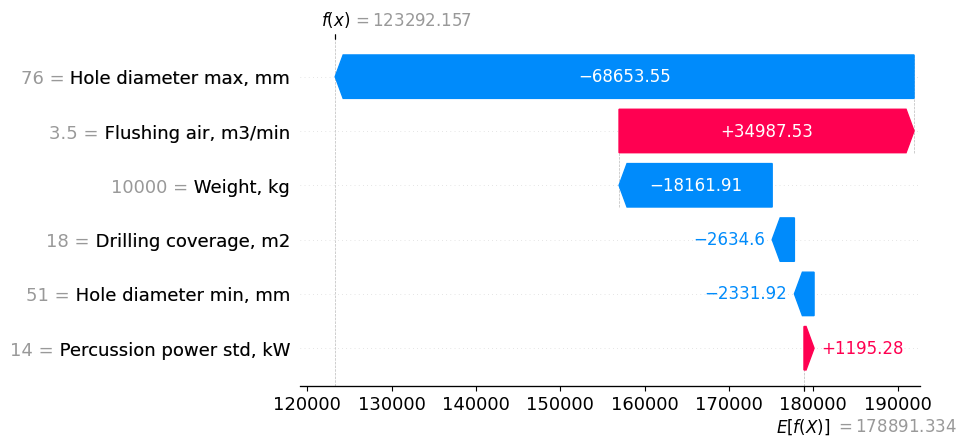

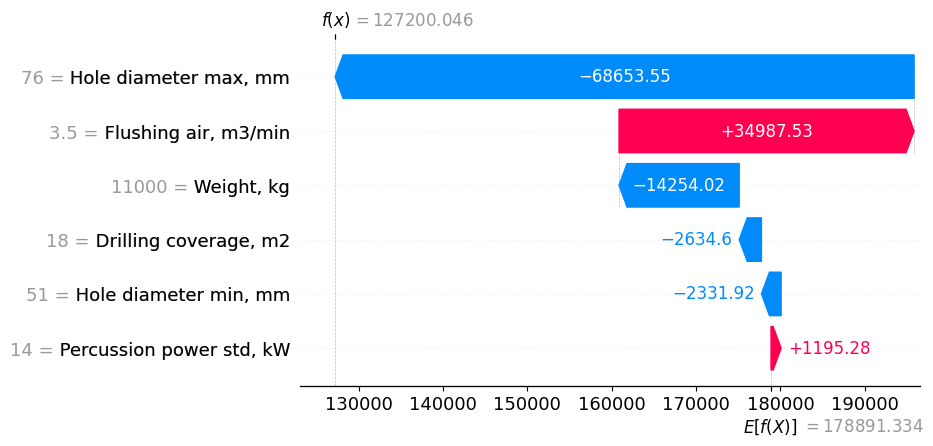

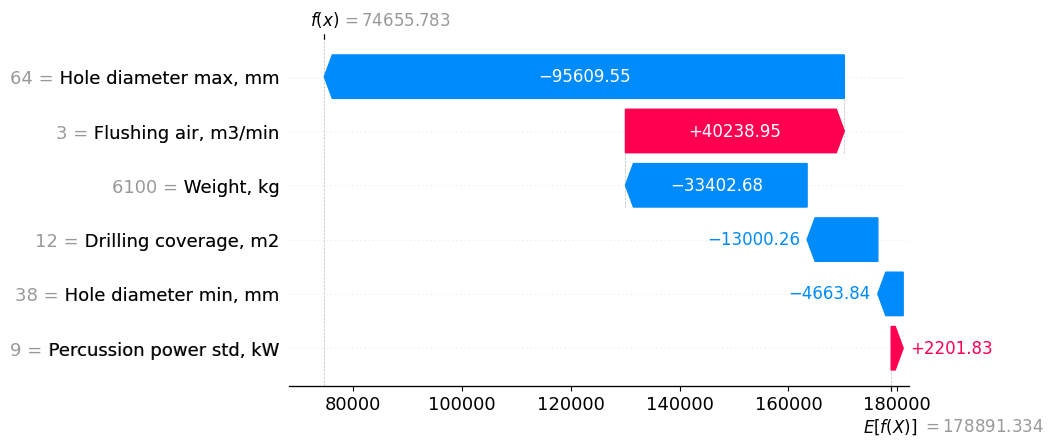

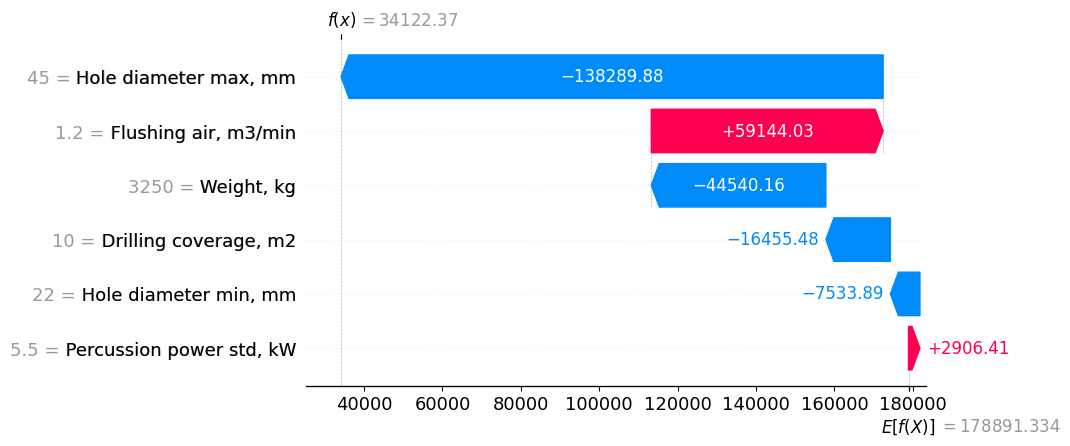

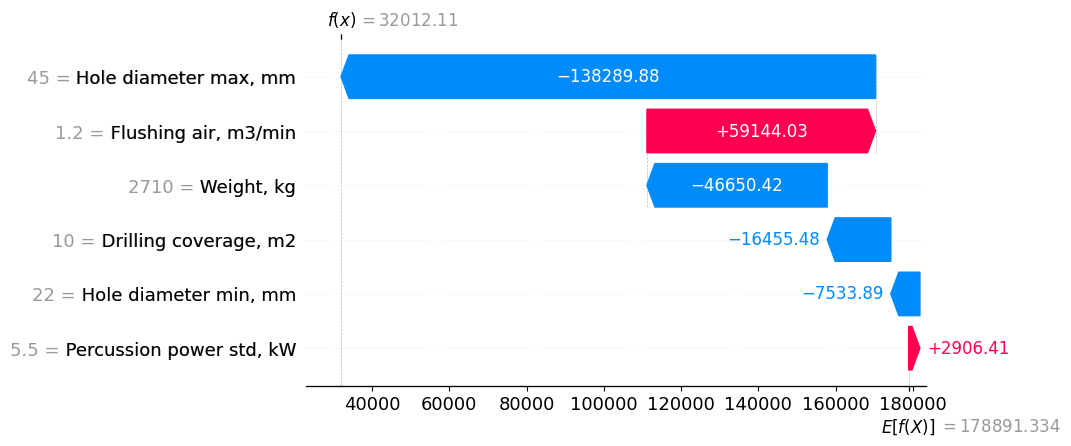

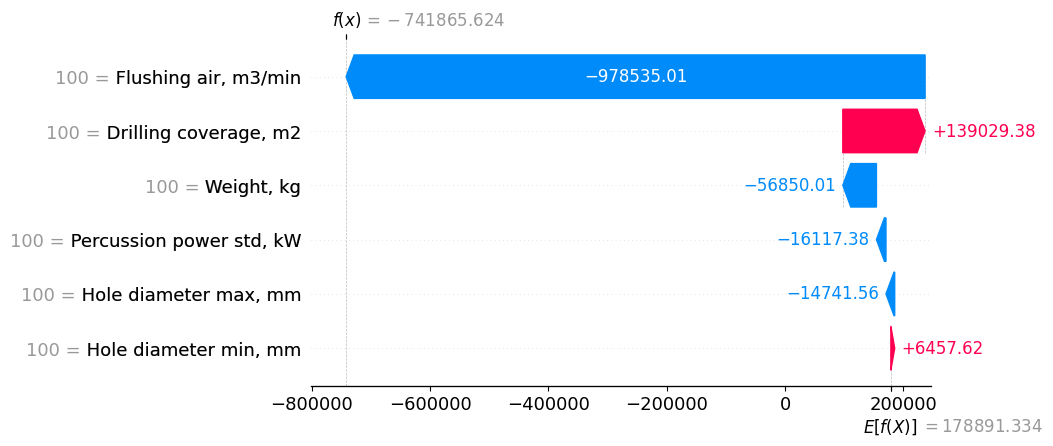

In [61]:
for exp in explanations:
    
    features_new, feature_names_new, values_new = list(), list(), list()
    for feature, feature_name, value in zip(exp.data, exp.feature_names, exp.values):
        if feature_name in ['cas_days_diff', 'eGFR', 'eGFR_next']: continue
        values_new.append(value)
        features_new.append(feature)
        feature_names_new.append(feature_name)
    exp.data = np.array(features_new)
    exp.values = np.array(values_new)
    exp.feature_names = feature_names_new

    shap.waterfall_plot(exp)
    
X.loc[len(X)] = [100, 105, 100, 100, 100, 100]
    

In [12]:
reg.score(X, y)

0.9297503500526726

In [13]:
reg.coef_

array([ 1.79378292e+02,  2.24633307e+03, -1.05028243e+04,  3.90788831e+00,
        1.72760956e+03, -2.01309988e+02])

In [14]:
reg.intercept_

-87175.07955200603